In [1]:
import json
import urllib.request
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

In [2]:
covid_url  = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_deaths_US.csv"

stats = pd.read_csv("california_county_stats.txt", delimiter=",")
covid = pd.read_csv(covid_url + covid_file, delimiter=",")

covid = covid.rename(columns={"Admin2":"County", "Province_State":"State"})
covid = covid[covid["State"] == "California"]
covid = covid.set_index("County")
stats = stats.set_index("County")
unused_columns = ["UID", "iso2", "iso3", "code3", "FIPS", "Long_", "Lat", "Country_Region", "Combined_Key", "State", "Population"]
covid = covid.drop(columns=unused_columns)

last_col = covid.shape[1]-1
for col in range(last_col, 0, -1):
    covid.iloc[:,col] = covid.iloc[:,col] - covid.iloc[:,col-1]
    
stats["Density"] = stats["Population"] / stats["Area"]
stats["Density"] = round(stats["Density"], 2)
stats["Total Deaths"] = covid.sum(axis=1)

print("Enter a county in California:")
county = input()

df = covid.copy()
merged = pd.merge(stats, covid, left_index=True, right_index=True)
rollingAvgData = covid.copy()

Enter a county in California:
Orange


In [4]:
covid.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,7,5,4,0,4,12
Alpine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amador,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
Butte,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,0,3,0,0,0
Calaveras,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
first_column = df.columns.get_loc("1/22/20")
last_column = df.shape[1]-2

while(len(county) < 3):
    print("Invalid county:")
    county = input()

In [7]:
county

'Orange'

In [8]:
y1_vals = df.loc[county][first_column:last_column]
x1_vals = df.loc[county][first_column:last_column].index
x1_vals = [datetime.strptime(day, '%m/%d/%y') for day in x1_vals]

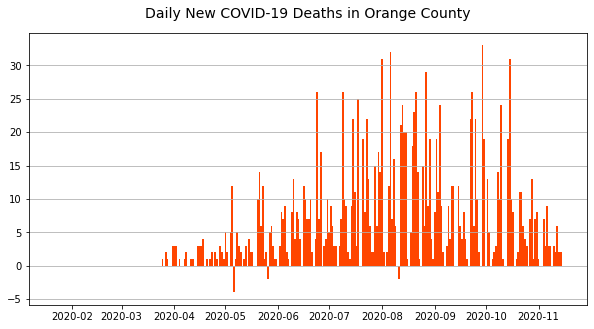

In [9]:
plt.figure(figsize=(10,5))
plt.gca().yaxis.grid()
plt.bar(x1_vals, y1_vals, width=1, color="orangered")
plt.title("Daily New COVID-19 Deaths in "+ county + " County", fontsize=14, pad=15)
plt.show()

In [ ]:
last_col = rollingAvgData.shape[1]
for pos in range(7):
    rollingAvgData.iloc[:,pos] = covid.iloc[:,(pos-6):(pos+1)].sum(axis=1)
    rollingAvgData.iloc[:,pos] = rollingAvgData.iloc[:,pos] / 7
    rollingAvgData.iloc[:,pos] = round(rollingAvgData.iloc[:,pos], 1)
for pos in range(7,last_col):
    rollingAvgData.iloc[:,pos] = covid.iloc[:,(pos-6):(pos+1)].sum(axis=1)
    rollingAvgData.iloc[:,pos] = rollingAvgData.iloc[:,pos] / 7
    rollingAvgData.iloc[:,pos] = round(rollingAvgData.iloc[:,pos], 1)

In [ ]:
#need to allow input for county, preferably they click on the map but text input seems easier
y2_vals = rollingAvgData.loc[county]
x2_vals = rollingAvgData.loc[county].index
x2_vals = [datetime.strptime(day, '%m/%d/%y') for day in x2_vals]
plt.figure(figsize=(10,5))
plt.gca().yaxis.grid()
plt.plot(x2_vals, y2_vals, "-", color="orangered")
plt.fill_between(x2_vals,y2_vals, color="red", alpha=0.7)
plt.title("Daily New COVID-19 Deaths in " + county + " County (7-Day Rolling Average)", fontsize=14, pad=15)
plt.show()

In [ ]:
first_column2 = rollingAvgData.columns.get_loc("1/22/20")
last_column2 = rollingAvgData.shape[1]
y3_vals = rollingAvgData.sum()
x3_vals = rollingAvgData.loc["Alameda"][first_column2:last_column2].index
x3_vals = [datetime.strptime(day, '%m/%d/%y') for day in x3_vals]

In [ ]:

y_coords = merged.iloc[0:,0] 
x_coords = merged.iloc[0:,1] 
dot_size = merged.loc[:]["Total Deaths"]/merged.loc[:]["Density"]

In [ ]:
y_coords

In [ ]:
california = mpimg.imread('california.png')

plt.figure(figsize=(15,10))

plt.scatter(x_coords, y_coords, alpha=0.3, s=dot_size*1500, color="purple")

plt.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05])

plt.title("California Covid Deaths", fontsize=18, pad=15)
plt.show()

In [ ]:
plt.subplots(1,3,figsize=(20,7))
plt.gca().yaxis.grid()
plt.bar(x1_vals, y1_vals, color="lightblue")
plt.plot(x2_vals, y2_vals, "-", color="red")
plt.plot(x3_vals, y3_vals, "-", color="black")
plt.fill_between(x2_vals,y2_vals, color="orangered", alpha=0.75)
plt.fill_between(x3_vals,y3_vals, color="black", alpha=0.35)
plt.title("Daily New COVID-19 Deaths in " + county + "County (7-Day Rolling Average)", fontsize=14, pad=15)
plt.show()

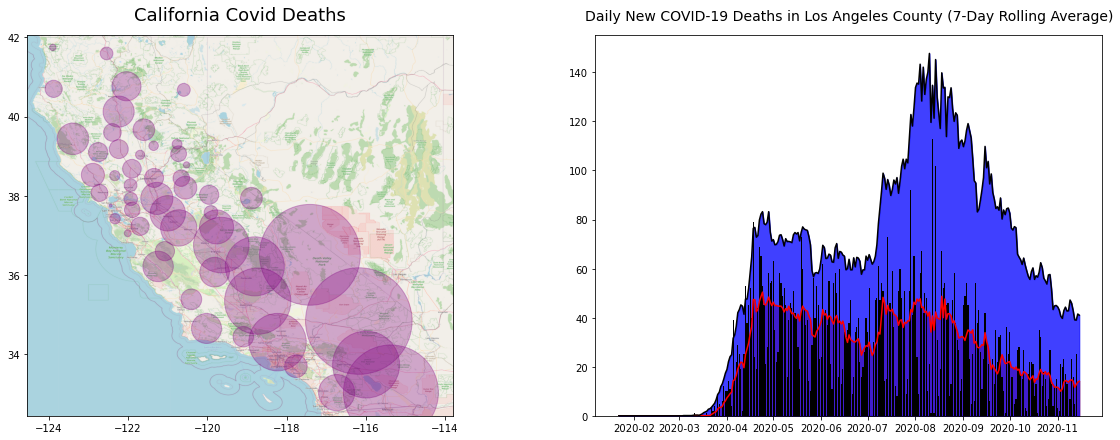

In [12]:
import json
import urllib.request
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
import sys

#Importing and reading the files needed 
covid_url  = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_deaths_US.csv"
stats = pd.read_csv("california_county_stats.txt", delimiter=",")
covid = pd.read_csv(covid_url + covid_file, delimiter=",")
california = mpimg.imread('california.png')
#Filtering the data to only what will be used
covid = covid.rename(columns={"Admin2":"County", "Province_State":"State"})
covid = covid[covid["State"] == "California"]
covid = covid.set_index("County")
stats = stats.set_index("County")
unused_columns = ["UID", "iso2", "iso3", "code3", "FIPS", "Long_", "Lat", "Country_Region", "Combined_Key", "State", "Population"]
covid = covid.drop(columns=unused_columns)
last_col = covid.shape[1]-1
for col in range(last_col, 0, -1):
    covid.iloc[:,col] = covid.iloc[:,col] - covid.iloc[:,col-1]
#Creating new useful columns
stats["Density"] = stats["Population"] / stats["Area"]
stats["Density"] = round(stats["Density"], 2)
stats["Total Deaths"] = covid.sum(axis=1)
#Getting input for county graph
county = sys.argv[0]
#Creating copies of filtered data
df = covid.copy()
merged = pd.merge(stats, covid, left_index=True, right_index=True)
rollingAvgData = covid.copy()
#Creating rolling average data
last_col = rollingAvgData.shape[1]
for pos in range(7):
    rollingAvgData.iloc[:,pos] = covid.iloc[:,(pos-6):(pos+1)].sum(axis=1)
    rollingAvgData.iloc[:,pos] = rollingAvgData.iloc[:,pos] / 7
    rollingAvgData.iloc[:,pos] = round(rollingAvgData.iloc[:,pos], 1)
for pos in range(7,last_col):
    rollingAvgData.iloc[:,pos] = covid.iloc[:,(pos-6):(pos+1)].sum(axis=1)
    rollingAvgData.iloc[:,pos] = rollingAvgData.iloc[:,pos] / 7
    rollingAvgData.iloc[:,pos] = round(rollingAvgData.iloc[:,pos], 1)
#Creating data sets needed for daily graph of specific county 
first_column1 = df.columns.get_loc("1/22/20")
last_column1 = df.shape[1]-2
y1_vals = df.loc[county][first_column1:last_column1]
x1_vals = df.loc[county][first_column1:last_column1].index
x1_vals = [datetime.strptime(day, '%m/%d/%y') for day in x1_vals]
#^^
y2_vals = rollingAvgData.loc[county]
x2_vals = rollingAvgData.loc[county].index
x2_vals = [datetime.strptime(day, '%m/%d/%y') for day in x2_vals]
#^^
first_column2 = rollingAvgData.columns.get_loc("1/22/20")
last_column2 = rollingAvgData.shape[1]
y3_vals = rollingAvgData.sum()
x3_vals = rollingAvgData.loc["Alameda"][first_column2:last_column2].index
x3_vals = [datetime.strptime(day, '%m/%d/%y') for day in x3_vals]

#Creating data set for Visual Covid deaths
y_coords = merged.iloc[0:,0] 
x_coords = merged.iloc[0:,1] 
dot_size = merged.loc[:]["Total Deaths"]/merged.loc[:]["Density"]

#Plotting the two separate graphs
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,7))
##Visual Graph
ax0.scatter(x_coords, y_coords, alpha=0.3, s=dot_size*1125, color="purple")
ax0.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05])
ax0.set_title("California Covid Deaths", fontsize=18, pad=15)
##County Graph
ax1.bar(x1_vals, y1_vals, color="black")
ax1.plot(x2_vals, y2_vals, "-", color="red")
ax1.plot(x3_vals, y3_vals, "-", color="black")
ax1.fill_between(x2_vals, y2_vals, color="orangered", alpha=0.75)
ax1.fill_between(x3_vals, y3_vals, color="blue", alpha=0.75)
ax1.set_title("Daily New COVID-19 Deaths in " + county + " County (7-Day Rolling Average)", fontsize=14, pad=15)

plt.show()